In [1]:
import pickle
from old_ZX_dualities import *
from old_XY_dualities import *
from old_automorphisms import *
from magma_interface import qec_code_auts_from_magma_with_intersection
from utils.qec import *
from utils.qiskit import *

In [2]:
n = 5
k = 1
d = 3
stabs = ['XZZXI','IXZZX','XIXZZ','ZXIXZ']
H_symp = stabs_to_H_symp(stabs)
G,LX,LZ,D = compute_standard_form(H_symp)

In [3]:
with open('./auts_n5k1d3.pkl', 'rb') as f:
    code_auts_dict = pickle.load(f)

## SH circuit

In [4]:
auts = code_auts_dict['auts']
aut = auts[2]
############################################   
phys_act = physical_circ_of_aut(H_symp,aut)
phys_circ = phys_act.circ_w_pauli_correction()
log_act = logical_circ_of_aut(H_symp,aut)
log_circ = log_act.circ_w_pauli_correction()

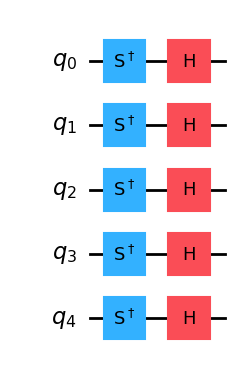

In [5]:
qc = construct_circuit(phys_circ, n)
qc.draw(output='mpl')

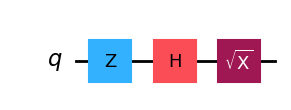

In [6]:
qc = construct_circuit(log_circ, k)
qc.draw(output='mpl')

## H circuit

In [7]:
filename_ZX = f'./ZX_dualities_n{n}k{k}d{d}.pkl'
with open(filename_ZX, 'rb') as f:
    code_ZX_dict = pickle.load(f)

In [8]:
auts_ZX = code_ZX_dict['auts']
aut_ZX = auts_ZX[1]
print(aut_ZX)
############################################     
phys_act_ZX = physical_circ_of_ZX_duality(H_symp,aut_ZX)
phys_circ_ZX = phys_act_ZX.circ_w_pauli_correction()
log_act_ZX = logical_circ_of_ZX_duality(H_symp,aut_ZX)
log_circ_ZX = log_act_ZX.circ_w_pauli_correction()

[(1, 2), (3, 8, 9, 6), (5, 4, 7, 10)]


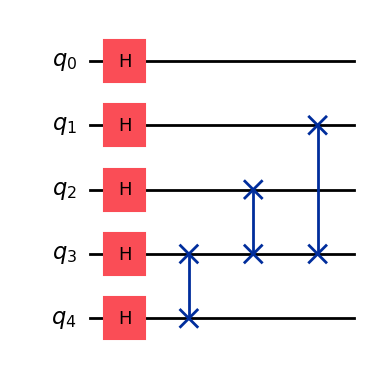

In [9]:
qc = construct_circuit(phys_circ_ZX, n)
qc.draw(output='mpl')

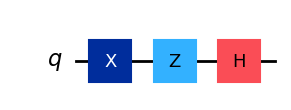

In [10]:
qc = construct_circuit(log_circ_ZX, k)
qc.draw(output='mpl')

## S circuit

In [11]:
filename_XY = f'./XY_dualities_n{n}k{k}d{d}.pkl'
with open(filename_XY, 'rb') as f:
    code_XY_dict = pickle.load(f)

In [12]:
auts_XY = code_XY_dict['auts']
aut_XY = auts_XY[1]
############################################     
phys_act_XY = physical_circ_of_XY_duality(H_symp,aut_XY)
phys_circ_XY = phys_act_XY.circ_w_pauli_correction()
log_act_XY = logical_circ_of_XY_duality(H_symp,aut_XY)
log_circ_XY = log_act_XY.circ_w_pauli_correction()

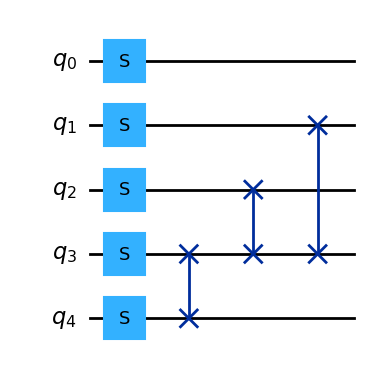

In [13]:
qc = construct_circuit(phys_circ_XY, n)
qc.draw(output='mpl')

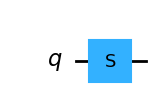

In [14]:
qc = construct_circuit(log_circ_XY, k)
qc.draw(output='mpl')